# 1. Data Collection 데이터 가져오기


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

#데이터 형식 파악하기
print(train.shape) #train 형식 파악하기
print(test.shape) #test 형식 파악하기

(1751, 81)
(1168, 80)


# 2 - Data preparation 데이터 준비하기

### 1 ) 결측치 분석
- 결측치 분포 확인 : Garage 관련 특성, Bmst 관련 특성들에게서 비슷한 결측치 개수가 나타남

In [2]:
#결측치 분포 확인
print(test.isnull().sum().head(40)) #처음부터 40까지
print(test.isnull().sum().tail(41)) #마지막부터 41까지


# 결측치가 존재하는 특성 전체 저장
null_data_all = test.isnull().sum()
null_data_all = null_data_all[null_data_all >= 1]
null_data_all = list(null_data_all.index)

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      185
LotArea            0
Street             0
Alley           1095
LotShape           0
LandContour        0
Utilities          1
LotConfig          0
LandSlope          0
Neighborhood       0
Condition1         0
Condition2         0
BldgType           0
HouseStyle         0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
RoofStyle          0
RoofMatl           0
Exterior1st        1
Exterior2nd        1
MasVnrType         7
MasVnrArea         7
ExterQual          0
ExterCond          0
Foundation         0
BsmtQual          28
BsmtCond          27
BsmtExposure      29
BsmtFinType1      27
BsmtFinSF1         0
BsmtFinType2      28
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
Heating            0
dtype: int64
Heating             0
HeatingQC           0
CentralAir          0
Electrical          0
1stFlrSF            0
2ndFlrSF            0
LowQualFinSF   

In [3]:
null_data_all

['LotFrontage',
 'Alley',
 'Utilities',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'MasVnrArea',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'BsmtFullBath',
 'BsmtHalfBath',
 'KitchenQual',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType']

### 2 ) 결측치 처리
-  결측치가 50% 이상 차지하는 특성 제거
- Garage, Bsmt 결측치는 다음 2가지 경우 중 하나에 속하며, 각 경우에 따라 처리한다.
- 
- 1) Garage, Bsmt 자체가 존재하지 않아서 관련된 데이터가 애초에 없기 때문에 결측치로 삽입된 경우
-  전부 'NA' 또는 'No' 또는 0 으로 처리
- 
- 2) Garage, Bsmt 자체는 존재하지만 나머지 데이터가 존재하지 않는 경우
-  해당 행과 비슷하지만 결측치가 없는 다른 행들의 최빈값으로 처리

In [4]:
null_data_delete = ['PoolQC', 'Fence', 'MiscFeature']
# 결측치가 50% 이상 차지하는 특성 제거
# Alley값이 null이면 골목이 없음 null 값이 많은것을 삭제하기 위한 준비

train_test_data = [train, test]
for dataset in train_test_data:
    dataset.drop(null_data_delete,axis=1,inplace=True) #널값을 삭제

##### Garage 관련 결측치

In [5]:
# Garage 관련 특성
GarageInfo = ['GarageType','GarageYrBlt','GarageFinish','GarageQual','GarageCond']

# Garage는 존재하나 관련된 데이터가 결측된 경우 - 910행이 해당된다는 것을 확인
test[(test['GarageType'].notnull()&test['GarageYrBlt'].isnull())][GarageInfo]

,GarageType,GarageYrBlt,GarageFinish,GarageQual,GarageCond
910,Detchd,NaN,NaN,NaN,NaN


In [6]:
# 910행과 GarageType이 일치하는 다른 행들의 정보 최빈값 확인
test[(test['GarageType'] == 'Detchd')][GarageInfo].mode()

,GarageType,GarageYrBlt,GarageFinish,GarageQual,GarageCond
0,Detchd,1950.0,Unf,TA,TA


In [7]:
# 그 행들의 최빈값으로 910행 결측치 채우기
test.loc[910,'GarageYrBlt'] = 1950
test.loc[910, 'GarageFinish'] = 'Unf'
test.loc[910, 'GarageQual'] = 'TA'
test.loc[910, 'GarageCond'] = 'TA'

In [8]:
# 나머지 58개의 결측치?
# 각각 다른 행에서 나타난 결측치가 아니라 한 행에서 Garage관련 특성이 일괄적으로 결측치이고 이런 행들이 58개임을 확인
# 정말 Garage 자체가 존재하지 않는가?

test[(test['GarageType'].isnull())][GarageInfo]

,GarageType,GarageYrBlt,GarageFinish,GarageQual,GarageCond
44,NaN,NaN,NaN,NaN,NaN
88,NaN,NaN,NaN,NaN,NaN
90,NaN,NaN,NaN,NaN,NaN
107,NaN,NaN,NaN,NaN,NaN
119,NaN,NaN,NaN,NaN,NaN
134,NaN,NaN,NaN,NaN,NaN
160,NaN,NaN,NaN,NaN,NaN
198,NaN,NaN,NaN,NaN,NaN
206,NaN,NaN,NaN,NaN,NaN
208,NaN,NaN,NaN,NaN,NaN


In [9]:
# 해당 행들의 Garage가 존재하는지 확인하기 위해 창고의 면적 특성인 'GarageArea' 확인
test[(test['GarageType'].isnull())]['GarageArea']

# 전부 0.0으로 저장되어있음
# 나머지 58개의 결측치들은 Garage 자체가 존재하지 않는 경우이므로 'NA'로 일괄적으로 처리 가능

44      0.0
88      0.0
90      0.0
107     0.0
119     0.0
134     0.0
160     0.0
198     0.0
206     0.0
208     0.0
218     0.0
238     0.0
264     0.0
276     0.0
280     0.0
291     0.0
293     0.0
314     0.0
323     0.0
363     0.0
378     0.0
433     0.0
469     0.0
472     0.0
485     0.0
499     0.0
525     0.0
531     0.0
542     0.0
562     0.0
593     0.0
599     0.0
616     0.0
653     0.0
678     0.0
714     0.0
737     0.0
753     0.0
761     0.0
780     0.0
783     0.0
817     0.0
832     0.0
838     0.0
862     0.0
868     0.0
944     0.0
973     0.0
991     0.0
1008    0.0
1022    0.0
1028    0.0
1069    0.0
1075    0.0
1116    0.0
1117    0.0
1127    0.0
1163    0.0
Name: GarageArea, dtype: float64

##### Bsmt 관련 결측치

In [10]:
# Bsmt 관련 데이터
BsmtInfo = ['BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1',
            'BsmtFinType2','BsmtFullBath','BsmtHalfBath']

In [11]:
test[(test['BsmtFullBath'].isnull())&test['BsmtHalfBath'].isnull()][BsmtInfo]

# BsmtFullBath, BsmtHalfBath 특성이 둘 다 결측된 경우
# 908행

,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,BsmtFullBath,BsmtHalfBath
908,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
test.loc[908, 'BsmtUnfSF']

# 908행은 Bsmt 자체가 존재하지 않음
# 908행의 Bsmt 관련 특성들을 모두 'NA'로 처리 가능

0.0

In [13]:
test.loc[908, 'BsmtQual'] = 'NA'
test.loc[908, 'BsmtCond'] = 'NA'
test.loc[908, 'BsmtExposure'] = 'NA'
test.loc[908, 'BsmtFinType1'] = 'NA'
test.loc[908, 'BsmtFinType2'] = 'NA'
test.loc[908, 'BsmtFullBath'] = 0
test.loc[908, 'BsmtHalfBath'] = 0

In [14]:
# BsmtExposure가 결측치인 행들의 BsmtUnfSF 확인
# 564, 1019 행들이 Bsmt는 존재하나 BsmtExposure이 결측치임을 확인

test[(test['BsmtExposure'].isnull())]['BsmtUnfSF']

75        0.0
76        0.0
191       0.0
264       0.0
267       0.0
280       0.0
330       0.0
334       0.0
499       0.0
564     936.0
599       0.0
663       0.0
665       0.0
678       0.0
689       0.0
795       0.0
822       0.0
832       0.0
860       0.0
873       0.0
898       0.0
928       0.0
946       0.0
982       0.0
1019    725.0
1035      0.0
1057      0.0
1130      0.0
Name: BsmtUnfSF, dtype: float64

In [15]:
# 564, 1019행 결측치 처리
# 564, 1019행의 정보 확인

print(test.loc[564,BsmtInfo])
print(test.loc[1019, BsmtInfo])

BsmtQual         Gd
BsmtCond         TA
BsmtExposure    NaN
BsmtFinType1    Unf
BsmtFinType2    Unf
BsmtFullBath      0
BsmtHalfBath      0
Name: 564, dtype: object
BsmtQual         Gd
BsmtCond         TA
BsmtExposure    NaN
BsmtFinType1    Unf
BsmtFinType2    Unf
BsmtFullBath      0
BsmtHalfBath      0
Name: 1019, dtype: object


In [16]:
# 564 행의 BsmtUnfSF와 비슷한 데이터를 가진 행들의 BsmtExposure 확인
# 최빈값이 No
# 결측치를 'No'로 처리
(test[((test['BsmtUnfSF'] >= 650) & (test['BsmtUnfSF'] <= 800))]['BsmtExposure']).describe()
test.loc[564, 'BsmtExposure'] = 'No'

In [17]:
# 1019 행의 BsmtUnfSF와 비슷한 데이터를 가진 행들의 BsmtExposure 확인
# 최빈값이 No
# 결측치를 'No'로 처리
(test[((test['BsmtUnfSF'] >= 850) & (test['BsmtUnfSF'] <= 1000))]['BsmtExposure']).describe()
test.loc[1019, 'BsmtExposure'] = 'No'

In [18]:
# BsmtQual과 BsmtFinType2가 결측치인 행들의 BsmtUnfSF 확인
# 26행 모두 Bsmt가 존재하지 않음
# 후에 나오는 결측치 처리 과정에서 한 번에 'NA','No',0 으로 처리

test[(test['BsmtQual'].isnull()) & (test['BsmtFinType2'].isnull())]['BsmtUnfSF']

75      0.0
76      0.0
191     0.0
264     0.0
267     0.0
280     0.0
330     0.0
334     0.0
499     0.0
599     0.0
663     0.0
665     0.0
678     0.0
689     0.0
795     0.0
822     0.0
832     0.0
860     0.0
873     0.0
898     0.0
928     0.0
946     0.0
982     0.0
1035    0.0
1057    0.0
1130    0.0
Name: BsmtUnfSF, dtype: float64

In [19]:
# BsmtQual 특성이 결측되었으나 BsmtCond 특성은 존재하는 행 -> 1125행

test[(test['BsmtQual'].isnull()) & (test['BsmtCond'].notnull())][BsmtInfo]

,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,BsmtFullBath,BsmtHalfBath
1125,NaN,Fa,No,Unf,Unf,0.0,0.0


In [20]:
# BsmtCond와 BsmtFinType1, BsmtFinType2의 데이터가 일치하는 다른 행들을 이용해 결측치 채우기 (최빈값으로 채우는 방법)
# 'TA'로 채우기

test[(test['BsmtCond']=='Fa')&(test['BsmtFinType1']=='Unf')&(test['BsmtFinType2']=='Unf')][BsmtInfo]

,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,BsmtFullBath,BsmtHalfBath
20,TA,Fa,No,Unf,Unf,0.0,0.0
42,Gd,Fa,No,Unf,Unf,0.0,0.0
74,TA,Fa,No,Unf,Unf,0.0,0.0
119,TA,Fa,No,Unf,Unf,0.0,0.0
200,TA,Fa,No,Unf,Unf,0.0,0.0
262,TA,Fa,No,Unf,Unf,0.0,0.0
290,TA,Fa,No,Unf,Unf,0.0,0.0
349,TA,Fa,No,Unf,Unf,0.0,0.0
476,TA,Fa,No,Unf,Unf,0.0,0.0
489,Fa,Fa,No,Unf,Unf,0.0,0.0


In [21]:
test.loc[1125,'BsmtQual'] = 'TA'

In [22]:
# BsmtQual 특성은 결측되지 않았으나, BsmtFinType2 특성은 결측된 행 찾기 -> 278행

test[(test['BsmtFinType2'].isnull()) & (test['BsmtCond'].notnull())][BsmtInfo]

,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,BsmtFullBath,BsmtHalfBath
278,Gd,TA,No,GLQ,NaN,1.0,0.0


In [23]:
# BsmtQual, BsmtCond, BsmtFinType1의 데이터가 일치하는 다른 행들을 이용해 결측치 채우기 (최빈값으로 채우는 방법)
# 'Unf'로 채우기

test[(test['BsmtQual']=='Gd')&(test['BsmtCond']=='TA')&(test['BsmtFinType1']=='GLQ')]['BsmtFinType2'].describe()

count     224
unique      5
top       Unf
freq      208
Name: BsmtFinType2, dtype: object

In [24]:
test.loc[278,'BsmtFinType2'] = 'Unf'

##### FireplaceQu 결측치 처리  - 561개
- Fireplaces 특성의 데이터가 0인 행이라면 FireplaceQu 값은 당연히 'NA'
- 즉, 벽난로가 없으므로 벽난로 품질 값 또한 애초에 존재하지 않음 : 일괄적으로 'NA'처리

In [25]:
test[(test['FireplaceQu'].isnull())&(test['Fireplaces']==0)]

# Fireplaces가 0이면서, FireplaceQu가 결측치인 데이터는 총 561개의 행
# 즉 FireplaceQu의 결측치는 모두 'NA'로 처리 가능

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
2,1754,60,RL,NaN,9930,Pave,NaN,IR1,Lvl,AllPub,...,54,0,0,0,0,0,7,2006,WD,Normal
5,1757,50,RL,63.0,8375,Pave,NaN,Reg,Lvl,AllPub,...,0,0,0,0,0,0,6,2008,WD,Normal
6,1758,180,RM,21.0,1526,Pave,NaN,Reg,Lvl,AllPub,...,0,0,0,0,0,0,5,2009,WD,Normal
7,1759,50,RM,68.0,4080,Pave,Grvl,Reg,Lvl,AllPub,...,0,40,0,0,0,0,6,2009,WD,Normal
8,1760,50,RL,60.0,8064,Pave,NaN,Reg,Lvl,AllPub,...,0,0,0,231,0,0,12,2009,COD,Abnorml
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1162,2914,20,RL,NaN,23730,Pave,NaN,IR2,Lvl,AllPub,...,46,192,0,0,0,0,9,2008,WD,Normal
1163,2915,20,RL,70.0,8402,Pave,NaN,Reg,Lvl,AllPub,...,30,0,0,0,0,0,12,2007,New,Partial
1164,2916,50,RM,50.0,9140,Pave,NaN,Reg,HLS,AllPub,...,56,0,0,200,0,0,4,2010,COD,Normal
1165,2917,20,RL,NaN,8050,Pave,NaN,IR1,Lvl,AllPub,...,0,0,0,0,0,0,5,2010,WD,Normal


In [26]:
for dataset in train_test_data :
    dataset.loc[:,'FireplaceQu'].fillna(value='NA',inplace=True)

In [28]:
# 결측치 일괄 처리
# LotFrontage 특성은 평균값, 나머지 특성들은 모두 최빈값으로 결측치 채움

for dataset in train_test_data:
    dataset.loc[:,'LotFrontage'].fillna(value=train['LotFrontage'].mean(),inplace=True)
    dataset.loc[:,'Utilities'].fillna(value='AllPub',inplace=True)
    dataset.loc[:,'Exterior1st'].fillna(value='VinylSd',inplace=True)
    dataset.loc[:,'Exterior2nd'].fillna(value='VinylSd',inplace=True)
    dataset.loc[:,'MasVnrType'].fillna(value='None',inplace=True)
    dataset.loc[:,'MasVnrArea'].fillna(value=0,inplace=True)
    dataset.loc[:,'BsmtQual'].fillna(value='NA',inplace=True)
    dataset.loc[:,'BsmtCond'].fillna(value='NA',inplace=True)
    dataset.loc[:,'BsmtExposure'].fillna(value='No',inplace=True)
    dataset.loc[:,'BsmtFinType1'].fillna(value='NA',inplace=True)
    dataset.loc[:,'BsmtFinType2'].fillna(value='NA',inplace=True)
    dataset.loc[:,'KitchenQual'].fillna(value='TA',inplace=True)
    dataset.loc[:,'GarageType'].fillna(value='NA',inplace=True)
    dataset.loc[:,'GarageYrBlt'].fillna(value=0,inplace=True)
    dataset.loc[:,'GarageFinish'].fillna(value='NA',inplace=True)
    dataset.loc[:,'GarageQual'].fillna(value='NA',inplace=True)
    dataset.loc[:,'GarageCond'].fillna(value='NA',inplace=True)
    dataset.loc[:,'SaleType'].fillna(value='WD',inplace=True)
    # Alley값이 null이면 골목이 없음
    dataset.loc[:,'Alley'].fillna(value='NA',inplace=True)
    
train.dropna(how='any', axis=0, inplace=True)

In [30]:
test.isnull().sum()[test.isnull().sum() >= 1]

Series([], dtype: int64)

### 3 ) EDA

- 상관관계

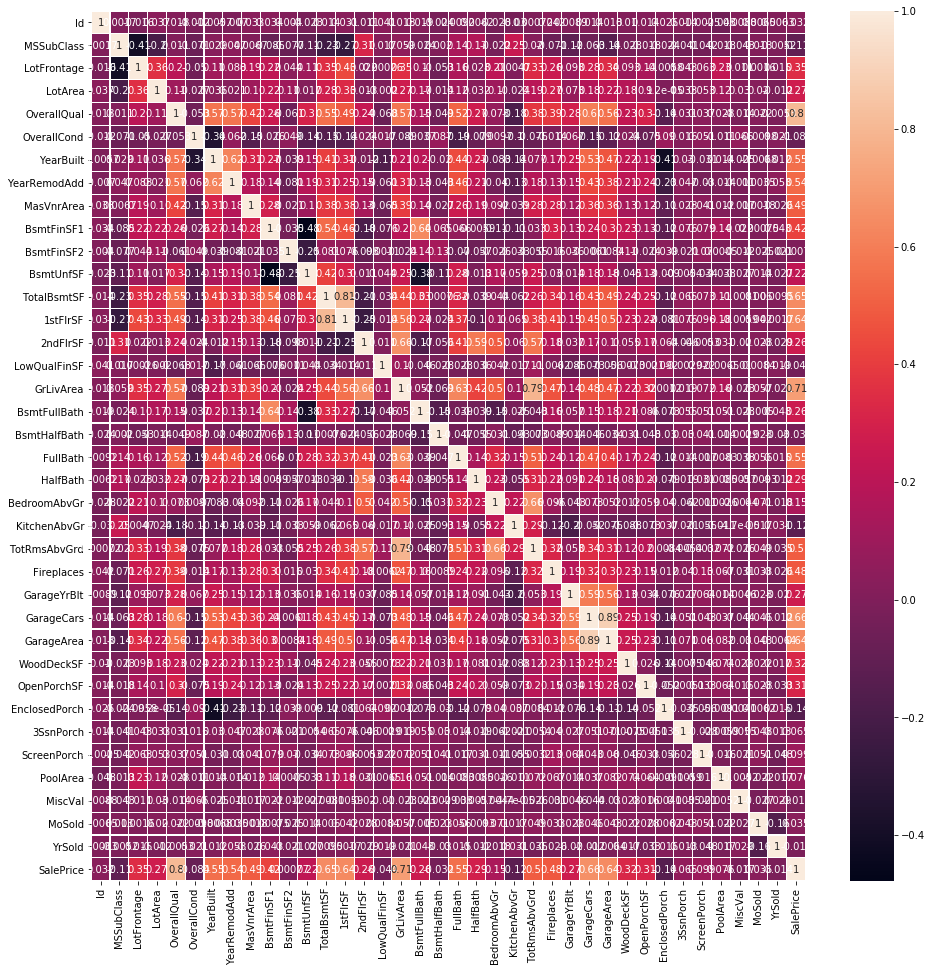

In [31]:
# 상관관계 확인

train_corr = train.loc[:,:'SalePrice'].corr()
plt.figure(figsize=(16,16)) 
ax = sns.heatmap(train_corr, annot = True, linecolor = 'white', linewidth = .1)

In [32]:
# SalePrice와 상관관계가 0.1 미만인 특성 삭제
no_features = ['ExterCond','BsmtFinSF2','LowQualFinSF','BsmtHalfBath',
               'KitchenAbvGr','3SsnPorch','PoolArea','MiscVal',
               'MoSold','YrSold']
# <0.2 지우기
#no_features += ['MSSubClass', 'OverallCond', 'BsmtUnfSF', 'BedroomAbvGr',
#               'EnclosedPorch', 'ScreenPorch']

- Label encoding

In [33]:
# 순위를 의미하는 명목형 데이터 모두 수치형으로 변환
list_ = ['ExterQual','ExterCond','BsmtQual','BsmtCond','HeatingQC','KitchenQual','FireplaceQu','GarageQual','GarageCond']
for dataset in train_test_data:
    for value in list_:
        dataset[value] = dataset[value].map({'Ex': 5,
                                             'Gd': 4,
                                             'TA': 3,
                                             'Fa': 2,
                                             'Po': 1,
                                             'NA': 0})

- object data boxplot

In [35]:
object_data = list(train.dtypes[train.dtypes == 'O'].index)
object_data

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'Foundation',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'CentralAir',
 'Electrical',
 'Functional',
 'GarageType',
 'GarageFinish',
 'PavedDrive',
 'SaleType',
 'SaleCondition']

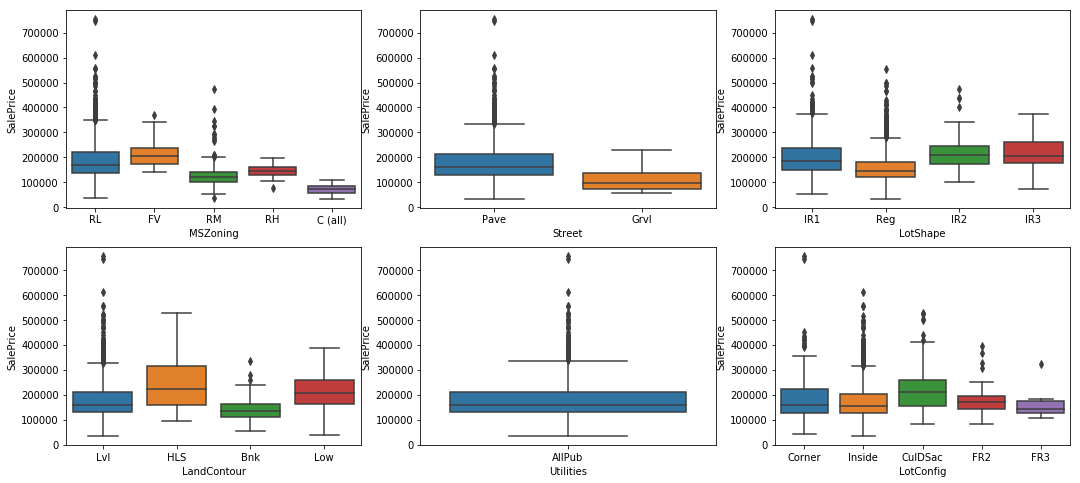

In [36]:
figure, ((ax1,ax2,ax3), (ax4,ax5,ax6)) = plt.subplots(nrows=2, ncols=3)
figure.set_size_inches(18,8)
sns.boxplot(data=train, x="MSZoning", y="SalePrice", ax=ax1)
sns.boxplot(data=train, x="Street", y="SalePrice", ax=ax2)
sns.boxplot(data=train, x="LotShape", y="SalePrice", ax=ax3)
sns.boxplot(data=train, x="LandContour", y="SalePrice", ax=ax4)
sns.boxplot(data=train, x="Utilities", y="SalePrice", ax=ax5)
sns.boxplot(data=train, x="LotConfig", y="SalePrice", ax=ax6)

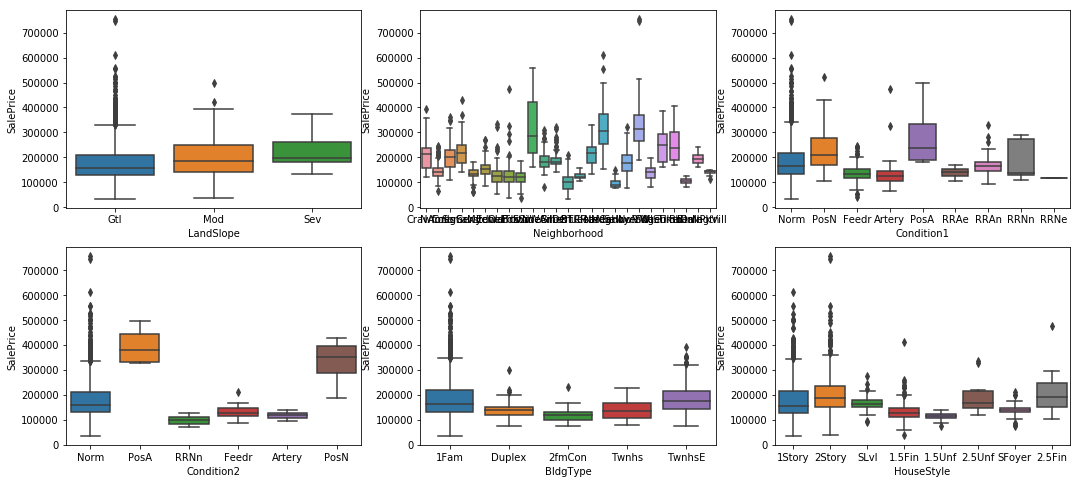

In [37]:
figure, ((ax1,ax2,ax3), (ax4,ax5,ax6)) = plt.subplots(nrows=2, ncols=3)
figure.set_size_inches(18,8)
sns.boxplot(data=train, x="LandSlope", y="SalePrice", ax=ax1)
sns.boxplot(data=train, x="Neighborhood", y="SalePrice", ax=ax2)
sns.boxplot(data=train, x="Condition1", y="SalePrice", ax=ax3)
sns.boxplot(data=train, x="Condition2", y="SalePrice", ax=ax4)
sns.boxplot(data=train, x="BldgType", y="SalePrice", ax=ax5)
sns.boxplot(data=train, x="HouseStyle", y="SalePrice", ax=ax6)

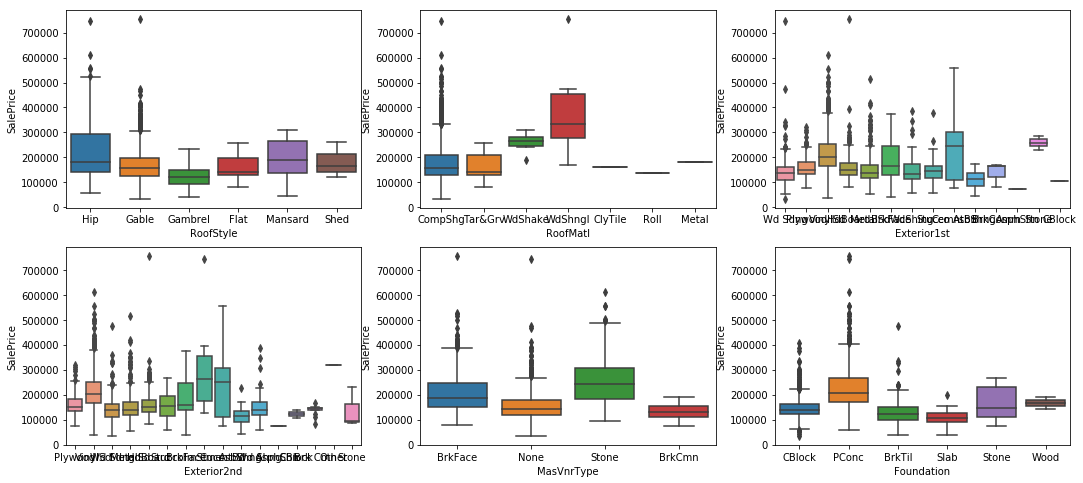

In [38]:
figure, ((ax1,ax2,ax3), (ax4,ax5,ax6)) = plt.subplots(nrows=2, ncols=3)
figure.set_size_inches(18,8)
sns.boxplot(data=train, x="RoofStyle", y="SalePrice", ax=ax1)
sns.boxplot(data=train, x="RoofMatl", y="SalePrice", ax=ax2)
sns.boxplot(data=train, x="Exterior1st", y="SalePrice", ax=ax3)
sns.boxplot(data=train, x="Exterior2nd", y="SalePrice", ax=ax4)
sns.boxplot(data=train, x="MasVnrType", y="SalePrice", ax=ax5)
sns.boxplot(data=train, x="Foundation", y="SalePrice", ax=ax6)

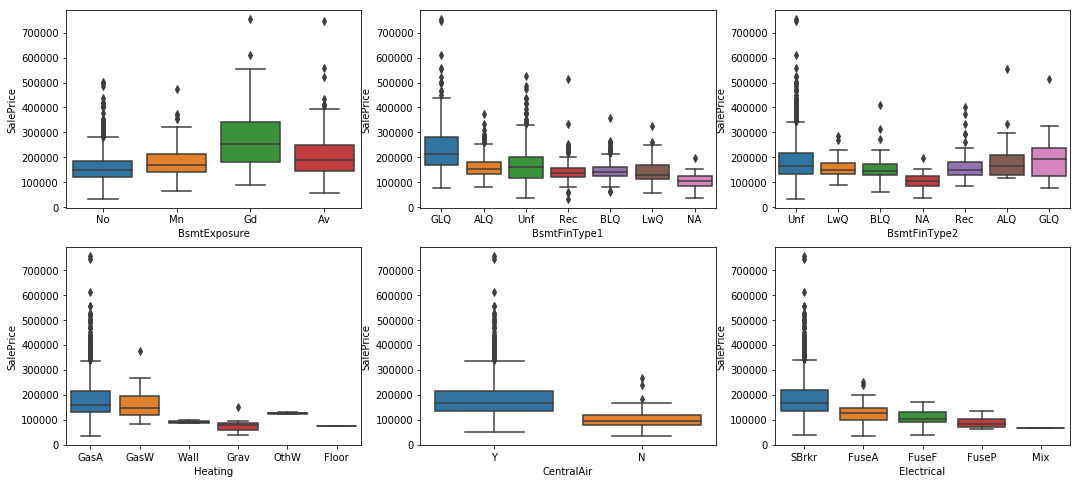

In [39]:
figure, ((ax1,ax2,ax3), (ax4,ax5,ax6)) = plt.subplots(nrows=2, ncols=3)
figure.set_size_inches(18,8)
sns.boxplot(data=train, x="BsmtExposure", y="SalePrice", ax=ax1)
sns.boxplot(data=train, x="BsmtFinType1", y="SalePrice", ax=ax2)
sns.boxplot(data=train, x="BsmtFinType2", y="SalePrice", ax=ax3)
sns.boxplot(data=train, x="Heating", y="SalePrice", ax=ax4)
sns.boxplot(data=train, x="CentralAir", y="SalePrice", ax=ax5)
sns.boxplot(data=train, x="Electrical", y="SalePrice", ax=ax6)

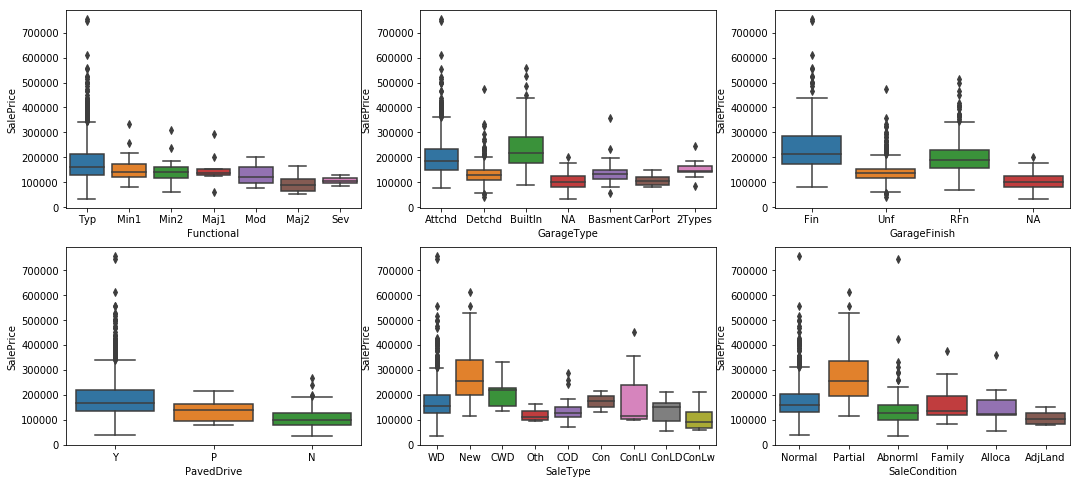

In [40]:
figure, ((ax1,ax2,ax3), (ax4,ax5,ax6)) = plt.subplots(nrows=2, ncols=3)
figure.set_size_inches(18,8)
sns.boxplot(data=train, x="Functional", y="SalePrice", ax=ax1)
sns.boxplot(data=train, x="GarageType", y="SalePrice", ax=ax2)
sns.boxplot(data=train, x="GarageFinish", y="SalePrice", ax=ax3)
sns.boxplot(data=train, x="PavedDrive", y="SalePrice", ax=ax4)
sns.boxplot(data=train, x="SaleType", y="SalePrice", ax=ax5)
sns.boxplot(data=train, x="SaleCondition", y="SalePrice", ax=ax6)

In [41]:
# 제외할 object형 데이터
no_features += ['Street','Utilities'] 
                #,'LotConfig', 'BldgType'

- feature engineering

In [42]:
# EDA 특성공학(1번씩만 실행)
for dataset in train_test_data :
    
    # 범주가 많아지는 것을 방지하기 위해 Neighborhood 정리
    dataset['Neighborhood'] = dataset['Neighborhood'].str.split().str[0]
    
    # Condition1과 Condition2 하나로 정리
    dataset['Condition'] = dataset['Condition1'] + dataset['Condition2']
    dataset.drop('Condition1', axis = 1, inplace = True)
    dataset.drop('Condition2', axis = 1, inplace = True)
    
    # YearBuilt와 YearRemodAdd 하나로 정리
    dataset['Year'] = (dataset['YearBuilt']+dataset['YearRemodAdd'])/2
    dataset.drop('YearBuilt', axis = 1, inplace = True)
    dataset.drop('YearRemodAdd', axis = 1, inplace = True)
    
    # Exterior1st와 Exterior2nd 하나로 정리
    dataset['Exterior'] = dataset['Exterior1st'] + dataset['Exterior2nd']
    dataset.drop('Exterior1st', axis = 1, inplace = True)
    dataset.drop('Exterior2nd', axis = 1, inplace = True)
    
    # BsmtFinType1와 BsmtFinType2 하나로 정리
    dataset['BsmtFinType'] = dataset['BsmtFinType1'] + dataset['BsmtFinType2']
    dataset.drop('BsmtFinType1', axis = 1, inplace = True)
    dataset.drop('BsmtFinType2', axis = 1, inplace = True)
    
    # OpenPorchSF와 EnclosedPorch 하나로 정리
    dataset['PorchSF'] = dataset['OpenPorchSF'] + dataset['EnclosedPorch']
    dataset.drop('OpenPorchSF', axis = 1, inplace = True)
    dataset.drop('EnclosedPorch', axis = 1, inplace = True)
    
    # OverallQual과 ExterQual, KitchenQual, BsmtQual 하나로 정리
    dataset['Qual'] = dataset['OverallQual'] * dataset['ExterQual'] * dataset['KitchenQual'] * dataset['BsmtQual']
    dataset.drop('OverallQual', axis = 1, inplace = True)
    dataset.drop('ExterQual', axis = 1, inplace = True)
    dataset.drop('KitchenQual', axis = 1, inplace = True)
    dataset.drop('BsmtQual', axis = 1, inplace = True)
    
    # LotFrontage와 LotArea 정리
    dataset['LotAreaFr'] = np.log10(dataset['LotArea'])
    dataset.drop('LotFrontage', axis = 1, inplace = True)
    dataset.drop('LotArea', axis = 1, inplace = True)
    
    # Fireplaces와 FireplaceQu 정리
    dataset['FirePlace'] = dataset['Fireplaces'] * dataset['FireplaceQu']
    dataset.drop('Fireplaces', axis = 1, inplace = True)
    dataset.drop('FireplaceQu', axis = 1, inplace = True)
    
    # GarageCars와 GarageArea 정리
    dataset['GarageAr'] = dataset['GarageCars'] * dataset['GarageArea']
    dataset.drop('GarageCars', axis = 1, inplace = True)
    dataset.drop('GarageArea', axis = 1, inplace = True)
    
    # GarageCond와 GarageQual 정리
    dataset['GarageQu'] = dataset['GarageQual'] * dataset['GarageCond']
    dataset.drop('GarageQual', axis = 1, inplace = True)
    dataset.drop('GarageCond', axis = 1, inplace = True)
    
    # GarageQu와 GarageAr 정리
    dataset['Garage'] = dataset['GarageQu'] * dataset['GarageAr']
    dataset.drop('GarageQu', axis = 1, inplace = True)
    dataset.drop('GarageAr', axis = 1, inplace = True)
    

In [44]:
# 과대적합 방지
no_features += ['1stFlrSF','2ndFlrSF','TotRmsAbvGrd','BsmtCond',
                'BsmtUnfSF','GarageYrBlt','BsmtFinSF1', 
                'HeatingQC',]
                #','Year','Garage','LotAreaFr'

# 이상치 제거
# IQR 방식
from collections import Counter
def detect_outliers(df, n, features):
    outlier_indices = []
    for col in features:
        Q1 = np.percentile(df[col], 25)
        Q3 = np.percentile(df[col], 75)
        IQR = Q3 - Q1
        outlier_step = 1.5 * IQR
        outlier_list_col = df[(df[col] < Q1 - outlier_step) | (df[col] > Q3 + outlier_step)].index
        outlier_indices.extend(outlier_list_col)
    
    outlier_indices = Counter(outlier_indices)
    multiple_outliers = list(k for k, v in outlier_indices.items() if v > n)
    return multiple_outliers

Outliers_to_drop = detect_outliers(train, 2, 
                ['MasVnrArea',
                 'TotalBsmtSF',  
                 'LowQualFinSF', 'GrLivArea', 
                 'BedroomAbvGr', 'BsmtFullBath', 'FullBath', 'HalfBath', 
                 'KitchenAbvGr',
                  'WoodDeckSF',
                 '3SsnPorch', 'ScreenPorch', 'PoolArea',
                 'MiscVal', 'MoSold', 'YrSold','SalePrice'])

train = train.drop(Outliers_to_drop,axis=0).reset_index(drop=True)

### 4 ) one-hot encoding

In [46]:
#train and test split one-hot 인코딩을 위해 X_train,y_train,X_test분리
train_ = train.drop(no_features, axis = 1)
X_train = train_.drop('SalePrice', axis = 1)
y_train = train.SalePrice
X_test = test.drop(no_features, axis = 1)

In [47]:
#X_train 컬럼들을 확인
X_train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'Alley', 'LotShape', 'LandContour',
       'LotConfig', 'LandSlope', 'Neighborhood', 'BldgType', 'HouseStyle',
       'OverallCond', 'RoofStyle', 'RoofMatl', 'MasVnrType', 'MasVnrArea',
       'Foundation', 'BsmtExposure', 'TotalBsmtSF', 'Heating', 'CentralAir',
       'Electrical', 'GrLivArea', 'BsmtFullBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'Functional', 'GarageType', 'GarageFinish',
       'PavedDrive', 'WoodDeckSF', 'ScreenPorch', 'SaleType', 'SaleCondition',
       'Condition', 'Year', 'Exterior', 'BsmtFinType', 'PorchSF', 'Qual',
       'LotAreaFr', 'FirePlace', 'Garage'],
      dtype='object')

In [48]:
#X_train에 행과 열의 갯수 확인하기
X_train.shape

(1693, 44)

In [50]:
# 범주형 데이터 처리
X_train = pd.get_dummies(X_train)
X_test = pd.get_dummies(X_test)

# X_train과 X_test의 컬럼 개수와 순서가 모두 같아야한다
# 차집합을 구해서 더해주면 같아질 수 있다
X_train_col_list = list(set(X_test) - set(X_train))
X_test_col_list = list(set(X_train) - set(X_test))

for col in X_train_col_list :
    X_train[col] = 0     # col 변수에 있는 컬럼을 추가
for col in X_test_col_list :
    X_test[col] = 0     # col 변수에 있는 컬럼을 추가
    
# 순서 맞춰주기
X_train.sort_index(axis = 1, inplace = True)
X_test.sort_index(axis = 1, inplace = True)

# 3 - Choose a model

In [51]:
from sklearn.linear_model import LinearRegression #선형회귀 모델
from sklearn.linear_model import Lasso #선형회귀 제약조건 모델 Lasso
from sklearn.linear_model import Ridge #선형회귀 제약조건 모델 Ridge

# 4 - Train the model

In [52]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
# 파이프라인 = 데이터변환(전처리)와 모델을 연결하여 코드를 줄이고 재사용성을 높이기 위해 사용함
from sklearn.linear_model import ElasticNet # 델을 평가할 때 여러개의 지표를 이용할 수 있도록 만드는 모델
from sklearn.model_selection import cross_val_score # 다중평가 지표 

#1. 선형회귀 모델
model_LinearRegression= make_pipeline(RobustScaler(), LinearRegression())
model_LinearRegression.fit(X_train,y_train)
LinearRegression_predictions=model_LinearRegression.predict(X_test)
train_LinearRegression=model_LinearRegression.predict(X_train)

#2. Lasso 선형회귀 모델은 제약 조건을 추가하며 적절한 가중치와 편향을 찾아냄.
model_Lasso= make_pipeline(RobustScaler(), Lasso(alpha = 50))

model_Lasso.fit(X_train,y_train)

Lasso_predictions=model_Lasso.predict(X_test)

train_Lasso=model_Lasso.predict(X_train)

#3. Ridge 선형회귀 모델은 Lasso와 마찬가지로 제약조건을 추가하나,
#Lasso는 변수 간 상관관계가 높은 상황에서 좋은 예측 성능이 되지만
#Ridge는 변수간 상관관계가 높은 상황에서 상대적으로 예측 성능이 떨어진다.
model_Ridge= make_pipeline(RobustScaler(), Ridge(alpha = 50))

model_Ridge.fit(X_train,y_train)

Ridge_predictions=model_Ridge.predict(X_test)

train_Ridge=model_Ridge.predict(X_train)

# 5 - Evaluate the model

In [53]:
print('Linear (train): ',model_LinearRegression.score(X_train, y_train))
print('Linear (test): ',(cross_val_score(model_LinearRegression,X_train,y_train,cv=5).mean()))
print('-'*50)
print('Lasso (train): ',model_Lasso.score(X_train, y_train))
print('Lasso (test): ',(cross_val_score(model_Lasso,X_train,y_train,cv=5).mean()))
print('-'*50)
print('Ridge (train): ',model_Ridge.score(X_train, y_train))
print('Ridge (test): ',(cross_val_score(model_Ridge,X_train,y_train,cv=5).mean()))

Linear (train):  0.953958929498017
Linear (test):  -3.810416956849902e+16
--------------------------------------------------
Lasso (train):  0.9477808042208654
Lasso (test):  0.9376441673241713
--------------------------------------------------
Ridge (train):  0.9427984435264548
Ridge (test):  0.934083127337205


# 6 - Parameter

In [54]:
#2. Lasso 모델 채택
model_Lasso= make_pipeline(RobustScaler(), Lasso(alpha = 44))
# 테스트값이 높았던 alpha값 44 채택
# 45 0.9376960111670167  44 0.9376969348154391 430.9376958007802715 44.1 0.9376969031098715 44.01 0.9376969329097097

model_Lasso.fit(X_train,y_train)
Lasso_predictions = model_Lasso.predict(X_test)
train_Lasso = model_Lasso.predict(X_train)

#3. Ridge 모델 채택
# 테스트값이 높았던 alpha값 50 채택
model_Ridge= make_pipeline(RobustScaler(), Ridge(alpha = 50))

model_Ridge.fit(X_train,y_train)
Ridge_predictions=model_Ridge.predict(X_test)
train_Ridge=model_Ridge.predict(X_train)

In [55]:
print('Linear (train): ',model_LinearRegression.score(X_train, y_train))
print('Linear (test): ',(cross_val_score(model_LinearRegression,X_train,y_train,cv=5).mean()))
print('-'*50)
print('Lasso (train): ',model_Lasso.score(X_train, y_train))
print('Lasso (test): ',(cross_val_score(model_Lasso,X_train,y_train,cv=5).mean()))
print('-'*50)
print('Ridge (train): ',model_Ridge.score(X_train, y_train))
print('Ridge (test): ',(cross_val_score(model_Ridge,X_train,y_train,cv=5).mean()))

Linear (train):  0.953958929498017
Linear (test):  -3.810416956849902e+16
--------------------------------------------------
Lasso (train):  0.948385286091543
Lasso (test):  0.9376969348154391
--------------------------------------------------
Ridge (train):  0.9427984435264548
Ridge (test):  0.934083127337205


# 7 - Make a prediction

In [56]:
y_pred = model_Lasso.predict(X_test) # 제출할 타겟 변수 예측값 불러오기
_ = pd.Series(y_pred) # 제출할 예측값을 _값에 저장
_.name = 'SalePrice' # 타겟 변수의 이름을 'SalePrice'로 저장
submission = pd.concat([test['Id'],_], axis=1) # 제출할 양식에 맞게 데이터 구성

In [57]:
submission.to_csv('SubmissionRealFinal.csv', index=False) # 제출할 파일을 csv 형식으로 내보내기